## Monte Carlo Integration

This is a novel method of integration whereby we can perform random calculations to arrive at an exact result of an integration. Consider the integration
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] \ dx $$

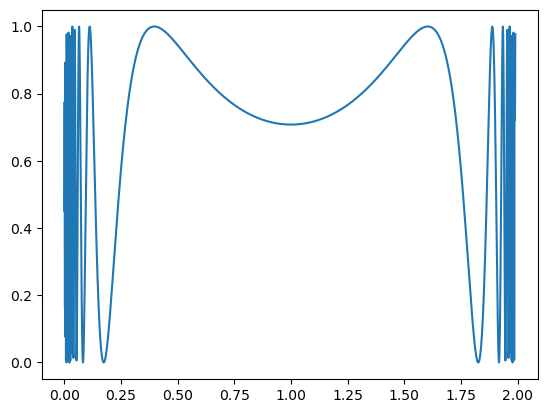

In [1]:
# plot the integrand between x=0 and x=2
import numpy as np
import matplotlib.pyplot as plt

def integrand(x):
    return np.sin(1/x/(2-x))**2

x = np.arange(0.001,1.99,0.001)
plt.plot(x,integrand(x))

Although the function is continuous in the middle of the range, it varies arbitrarily near the edges, and so, applying any known methods of integration like trapezoid or Gaussian quadrature becomes challenging in such a situation.  
We are concerned with finding the shaded area under the curve, $I$.

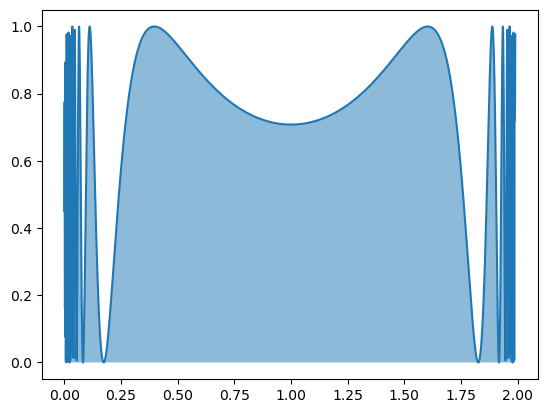

In [2]:
plt.plot(x,integrand(x))
plt.fill_between(x,0,integrand(x),alpha=0.5)

The total bounding area of the curve, $A$, is 2! So $I\leq2$.

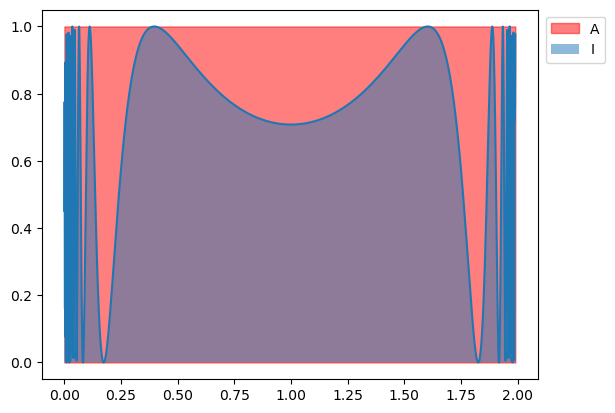

In [3]:
plt.fill_between(x,0,1,color='red',alpha=0.5,label='A')
plt.plot(x,integrand(x))
plt.fill_between(x,0,integrand(x),alpha=0.5,label='I')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')

The probability of generating a uniform random number within the bounding area is thus, given by
$$ p = \frac{I}{A} $$
We then do the following:
* Generate N (uniform) random numbers that fall within the bounding area.
* Count the number of points $k$ that fall under the curve.
* Roughly speaking, the probaility of points under the curve $k/N$, should equal $p$. This gives us $I/A\simeq k/N$.
* Calculate the **approximate** $I\simeq kA/N$, using known values.

This is the **Monte Carlo integration**.

In [4]:
from random import random

A = 2        # total bounding area
N = 1000     # total number of points
count = 0    # number of points below the curve
for i in range(N):
    x = 2*random()
    y = random()
    if y<integrand(x):
        count += 1
        
I = count*A/N
print(I)

1.414


One of the greatest drawbacks of this method is that gives a very approximate result. But more importantly, the error associated with performing Monte Carlo integration goes as $\sim N^{-1/2}$, which is not impressive. The larger the sample of random numbers, the smaller the error, but the rate of error convergence is very low. As opposed to this, a simple method like Simpson's method has an error $\sim N^2$.
Hence, Monte Carlo integration should be used when all other methods fail, or when we are dealing in multiple integrals in higher dimensions.  
The error associated with Monte Carlo integration can be calculated using (see pg. 467 in book)
$$ \epsilon =  \frac{\sqrt{I(A-I)}}{\sqrt{N}} $$

In [5]:
# calculate the error involved in the above integration
eps = np.sqrt(I*(A-I)/N)
print(eps)

0.028785482452097274


## The mean value method

An easier, faster (no counting), more efficient method to approximate the above integration is the mean value method. For a general integration
$$ I = \int_a^b f(x) \ dx $$
the integration can be approximated by using
$$ I = \frac{(b-a)}{N}\sum_{i=1}^N f(x_i) $$
where $x_1,x_2,\dots, x_N$ are N randomly chosed points between $a$ and $b$.  
The error for this method is given by
$$ \epsilon = (b-a)\sqrt{\frac{{\rm var}\ f}{N}} $$
where ${\rm var}\ f = \langle f^2\rangle - \langle f\rangle^2 $.

In [6]:
# redo the calculation below with mean value method
# updated versions of python use numpy.random.rand() to generate random number array of given length
a, b = 0, 2
x = np.random.rand(N)
y = integrand(x)

Im    = (b-a)*np.sum(y)/N

# calculate the error of this calculation
var   = np.sum(y*y)/N - (np.sum(y)/N)**2
sigma = (b-a)*np.sqrt(var/N)
print('Mean value method: I={0}, error={1:5f}'.format(Im,sigma)) 

Mean value method: I=1.4486330382096908, error=0.016324


## Integrals in many dimensions

The greatest advantage of Monte Carlo integrations is its simple and cost-efficient translation to multiple integrals in higher dimensions. The mean value method, for example, can be easily extended to integration over a volume $V$ in higher dimensions as:
$$ I = \frac{V}{N}\sum_{i=1}^N f(\boldsymbol{r_i}) $$
where the points $\boldsymbol{r_i}$ are picked uniformly at random from the volume $V$.

### Area of a unit circle

Let us estimate the area of a circle of unit radius in 2 dimensions using a Monte Carlo method. The area of the circle, the shaded area below, is given by the integral
$$
I = \iint_{-1}^{+1} f(x,y) \ dx\ dy,
$$
where $f(x,y)=1$ everywhere inside the circle and zero everywhere outside. In other words,
$$ f(x,y) = \begin{cases}
           1 &\qquad\rm{if}\ x^2+y^2\leq1, \\
           0 &\qquad\mbox{otherwise.}
         \end{cases}
$$
Using Monte Carlo integration, we would generate a set of $N$ random points $(x,y)$, where both $x$ and $y$ are in the range from $-1$ to 1. Then 
$$
I \simeq {4\over N} \sum_{i=1}^N f(x_i,y_i).
$$

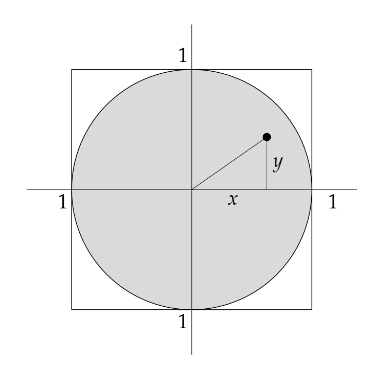

In [7]:
N = 1000000
dim = 2

def f(x):
	r2 = np.zeros(x.shape[1],float)
	for xi in x:
		r2 += xi**2
	return r2<1

x = np.random.rand(dim,N)*2 - 1   # the minus 1 takes care of the range -1 to +1

fx = f(x)
I  = 4*np.sum(fx)/N

var = np.sum(fx*fx)/N - (np.sum(fx)/N)**2
sigma = (b-a)*np.sqrt(var/N) 
print('I = {}, error {}'.format(I,sigma))

I = 3.13934, error 0.0008218735250024789


# Try it yourself

### Total 4 marks

Calculate the volume of a hypersphere with unit radius, in 10 dimensions. Note that the enclosing "volume" of the hypersphere depends on its dimensions.

In [8]:
N = 1000000
dim = 10

def f(x):
	r2 = np.zeros(x.shape[1],float)
	for xi in x:
		r2 += xi**2
	return r2<1

x = np.random.rand(dim,N)*2 - 1   # the minus 1 takes care of the range -1 to +1

fx = f(x)
I  = (2**dim)*np.sum(fx)/N

var = np.sum(fx*fx)/N - (np.sum(fx)/N)**2
sigma = 2**dim*np.sqrt(var/N) 
print('I = {}, error {}'.format(I,sigma))

I = 2.523136, error 0.05076736204221669
